In [129]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

In [130]:
df = pd.read_csv('D:Datasets/PracticeDatasets/Walmart.csv')

In [131]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [132]:
null_counts = df.isnull().sum()
print(null_counts)


Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64


<Figure size 1000x400 with 0 Axes>

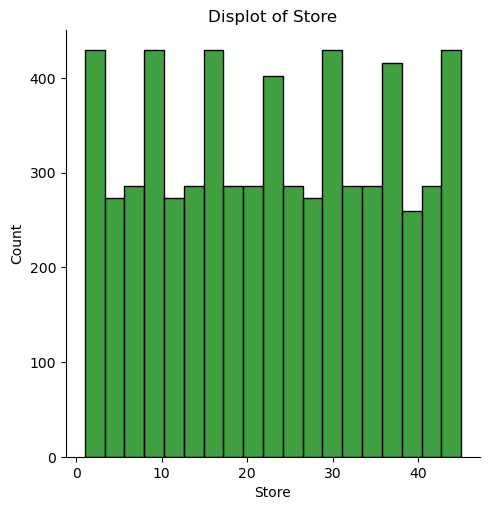

<Figure size 1000x400 with 0 Axes>

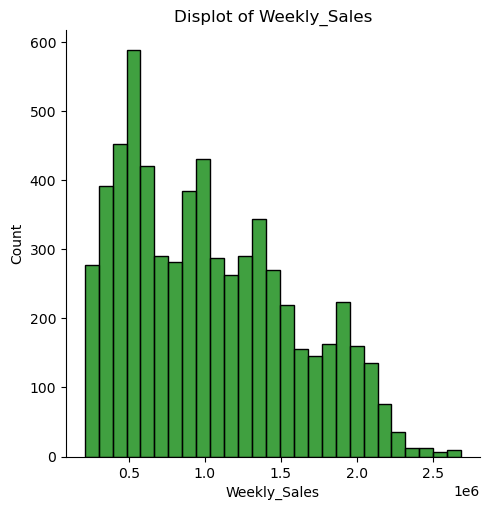

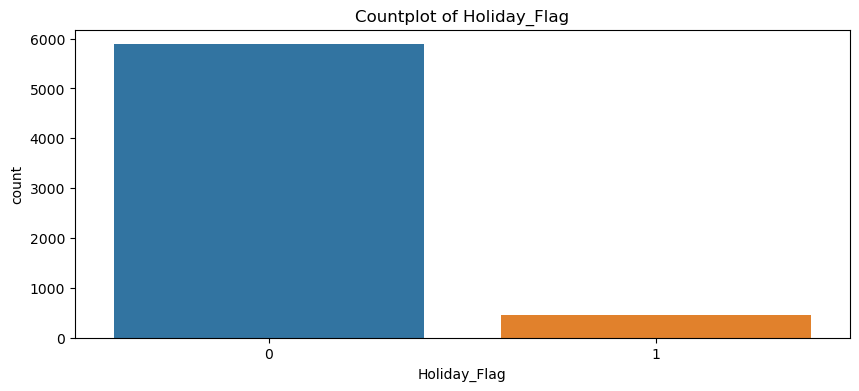

<Figure size 1000x400 with 0 Axes>

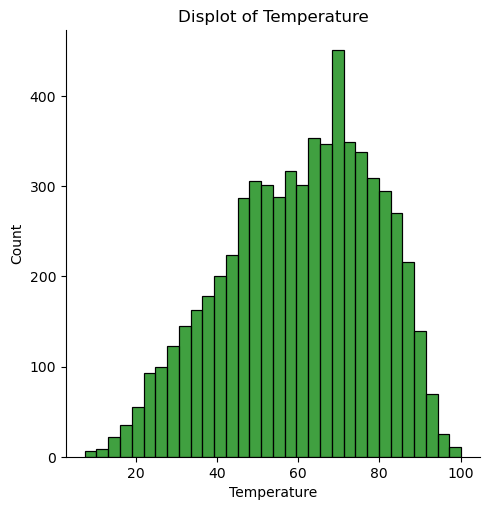

<Figure size 1000x400 with 0 Axes>

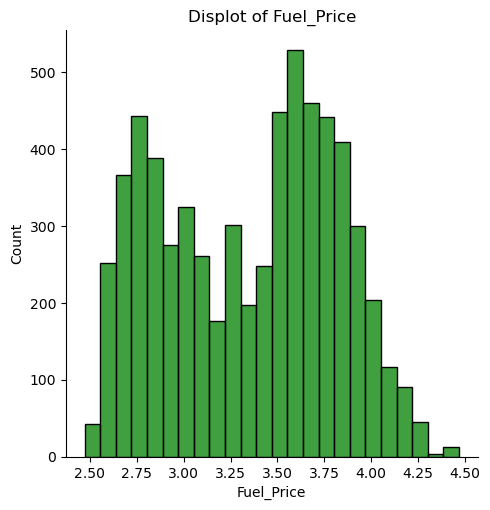

<Figure size 1000x400 with 0 Axes>

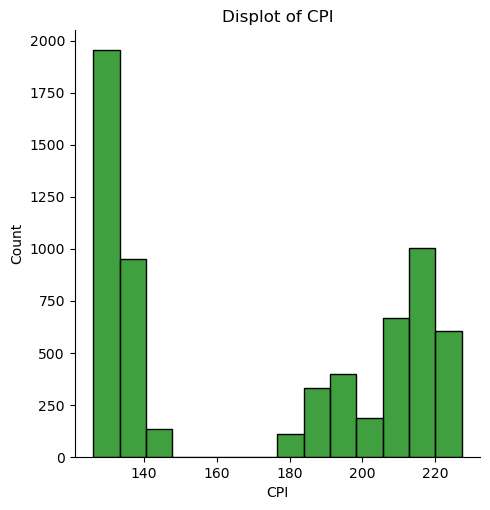

<Figure size 1000x400 with 0 Axes>

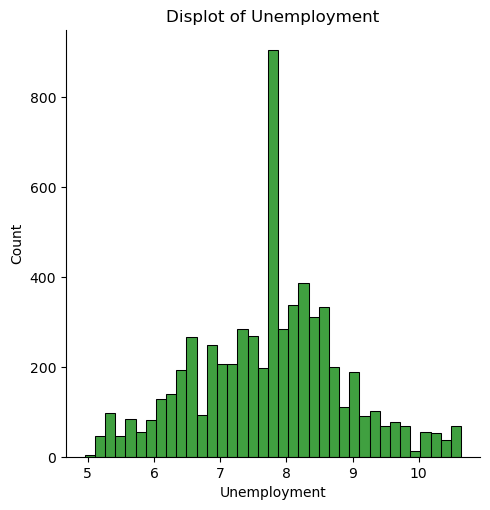

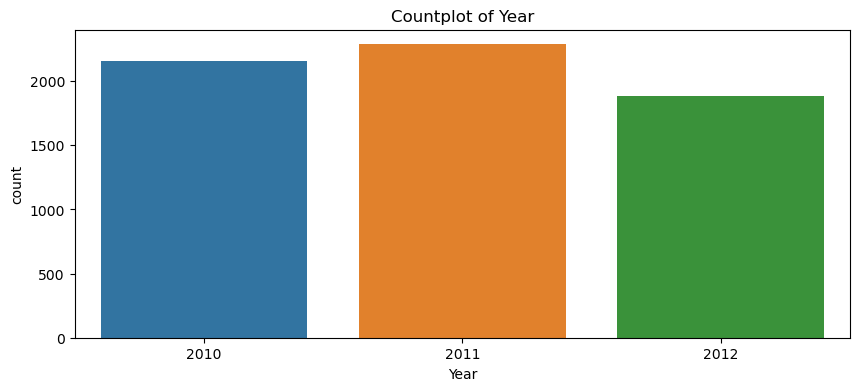

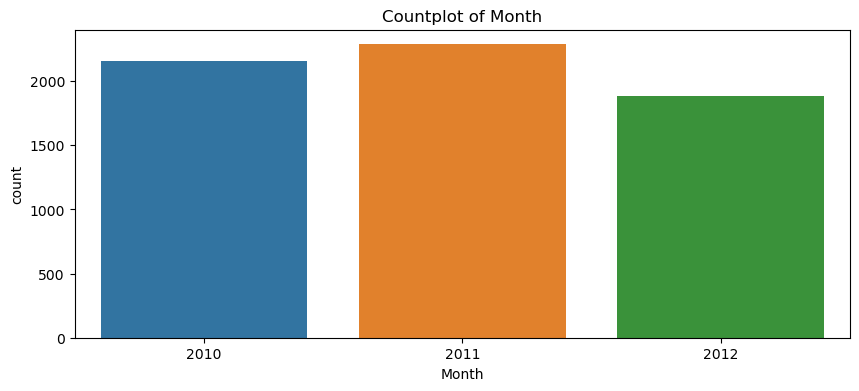

<Figure size 1000x400 with 0 Axes>

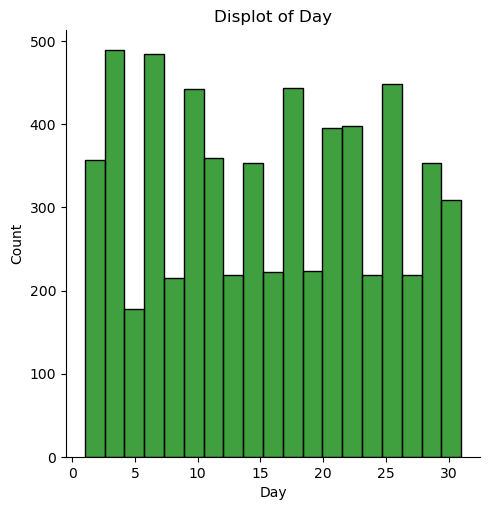

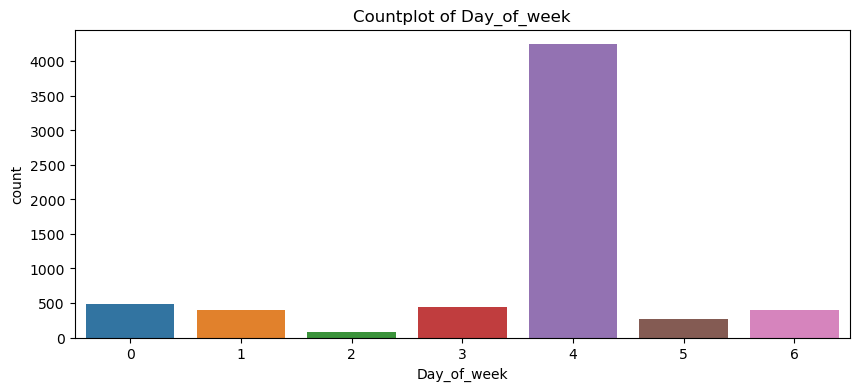

In [161]:
for column in df.columns:
    if df[column].nunique() <10:
        plt.figure(figsize=(10, 4))  # Change figure size to your liking
        sns.countplot(data=df, x=df[column])
        plt.title(f"Countplot of {column}")
        plt.show()
    else:
        plt.figure(figsize=(10, 4))  # Change figure size to your liking
        sns.displot(data=df, x=df[column],color='g')
        plt.title(f"Displot of {column}")
        plt.show()


In [134]:
print(df.dtypes)

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object


In [140]:
df['Date'] = pd.to_datetime(df['Date'])

C:\Users\danda\AppData\Local\Temp\ipykernel_12428\2394721818.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])


In [141]:
df['Year'] = df['Date'].dt.year

In [142]:
df['Month'] = df['Date'].dt.year

In [143]:
df['Day'] = df['Date'].dt.day
df['Day_of_week'] = df['Date'].dt.dayofweek

C:\Users\danda\AppData\Local\Temp\ipykernel_12428\3360652547.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Weekly_Sales'].sort_values().plot(kind='bar')


<Axes: >

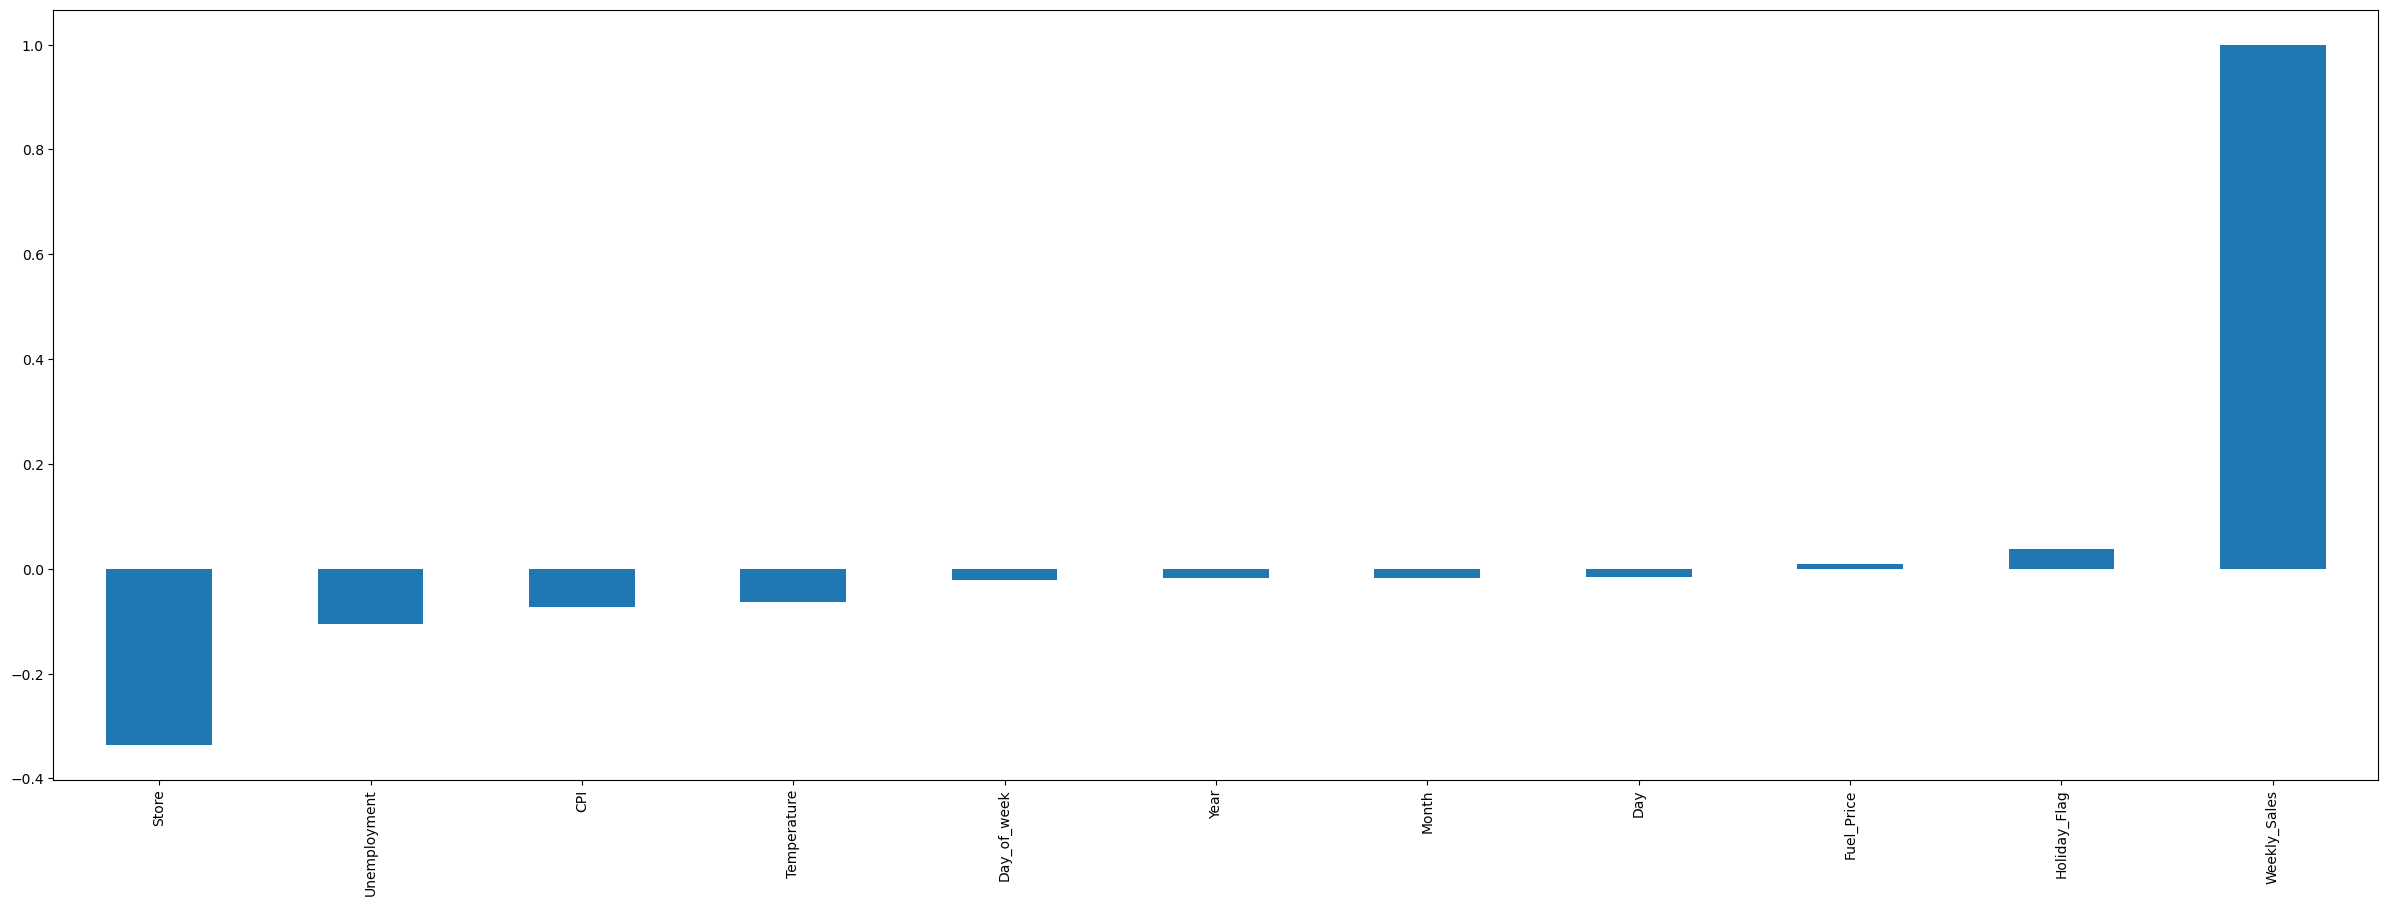

In [144]:
plt.figure(figsize=(30,10))
df.corr()['Weekly_Sales'].sort_values().plot(kind='bar')


In [145]:
import random
import os

os.environ['PYTHONHASHSEED'] = '0'
np.random.seed(36)
random.seed(36)
tf.random.set_seed(36)


In [146]:
df = df.drop("Date",axis=1)

In [147]:
df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,Day_of_week
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2010,2,6
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2010,2,3
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2010,19,4
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2010,26,4
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,2010,2010,3,0


In [148]:
df.shape

(6435, 11)

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
X = df.drop("Weekly_Sales",axis=1).values
y = df["Weekly_Sales"].values

In [75]:
from sklearn.preprocessing import MinMaxScaler

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=36)

In [77]:
Scaler = MinMaxScaler()

In [78]:
X_train = Scaler.fit_transform(X_train)
X_test = Scaler.transform(X_test)

In [79]:
from sklearn.linear_model import LinearRegression

In [80]:
lm = LinearRegression()

In [81]:
results = lm.fit(X_train, y_train)

In [82]:
predictions = lm.predict(X_test)

In [83]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, r2_score

In [84]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 427621.3956866688
MSE: 269631599943.67014
RMSE: 519260.62814705115


In [85]:
r2 = r2_score(y_test, predictions)

In [86]:
print("R2 Score: ", r2)

R2 Score:  0.14807044544764292


Random Forest Regressor

In [149]:
column_list = df.columns.tolist()

In [150]:
def detect_outlier(field):
    q1 = df[field].quantile(0.25)
    q3 = df[field].quantile(0.75)
    iqr = q3-q1

    threshold = iqr*1.5
    lb = q1-threshold
    ub = q3+threshold

    outliers = [feature for feature in df[field] if feature<lb or feature>ub]
    return outliers

In [151]:
outlier_features = {}
for i in column_list:
    outlier_features[i] = len(detect_outlier(i))*100/len(df)

In [152]:
outlier_features

{'Store': 0.0,
 'Weekly_Sales': 0.5283605283605284,
 'Holiday_Flag': 6.993006993006993,
 'Temperature': 0.046620046620046623,
 'Fuel_Price': 0.0,
 'CPI': 0.0,
 'Unemployment': 7.474747474747475,
 'Year': 0.0,
 'Month': 0.0,
 'Day': 0.0,
 'Day_of_week': 32.86713286713287}

In [153]:
outliers = ['Weekly_Sales','Temperature','Unemployment']

In [154]:
def return_bounds(field):
    q1 = df[field].quantile(0.25)
    q3 = df[field].quantile(0.75)
    iqr = q3-q1

    threshold = iqr*1.5
    lb = q1-threshold
    ub = q3+threshold

    return [ub,lb]

In [155]:
for i in outliers:
    lst = return_bounds(i)
    ub = lst[0]
    median = np.median(df[i])
    df[i] = np.where(df[i]>ub,median,df[i])

In [156]:
for i in outliers:
    lst = return_bounds(i)
    lb = lst[1]
    median = np.median(df[i])
    df[i] = np.where(df[i]<lb,median,df[i])

In [157]:
outlier_features = {}
for i in column_list:
    outlier_features[i] = len(detect_outlier(i))*100/len(df)

In [158]:
lst = return_bounds('Unemployment')
lb = lst[1]
ub = lst[0]

In [179]:
df = df[(df['Unemployment'] < ub) & (df['Unemployment'] > lb)]

In [160]:
df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,Day_of_week
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2010,2,6
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2010,2,3
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2010,19,4
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2010,26,4
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,2010,2010,3,0


In [167]:
from sklearn.preprocessing import StandardScaler

In [123]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
from sklearn.model_selection import train_test_split

In [169]:
X = df.drop("Weekly_Sales",axis=1).values
y = df["Weekly_Sales"].values

In [170]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=36)

In [171]:
scaler = StandardScaler()

In [172]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [173]:
rf = RandomForestRegressor(n_estimators = 100, n_jobs=-1,verbose=2)

In [174]:
results = rf.fit(X_train, y_train)

building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


In [177]:
y_pred = rf.predict(X_test)

[Parallel(n_jobs=24)]: Using backend ThreadingBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done 100 out of 100 | elapsed:    0.0s finished


In [180]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
r2 = r2_score(y_test, predictions)
print("R2 Score: ", r2)

MAE: 76205.96659425138
MSE: 24804907370.5062
RMSE: 157495.73762647103


ValueError: Found input variables with inconsistent numbers of samples: [1583, 1609]